# 1-Data exploration and preprocessing¶

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as ex
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [2]:
# the first dataset which shows the effective cost per mile(ecpm), value and date of each of them
df_A=pd.read_csv('ecpm_aggr.csv')
df_A.sample(5)

,Unnamed: 0,ecpm_value,date,app,country,ecpm_type
4000,40,0.721260,2021-07-14 13:30:27.883259,brilliant app B,BR,banner
3020,50,9.033572,2021-07-24 13:30:27.883259,awesome app A,ES,interstitial
1511,71,0.813679,2021-08-14 13:30:27.883259,awesome app A,JP,banner
373,13,0.771300,2021-06-17 13:30:27.883259,awesome app A,CA,banner
4158,18,0.758480,2021-06-22 13:30:27.883259,brilliant app B,DE,banner


In [3]:
# The second dataset which has the events amount , the version and also event type which is so important
df_B=pd.read_csv('events_data.csv')
df_B.head(5)

,Unnamed: 0,date,app,version,network,event_type,installs,days_after_installs,country,events_amount
0,0,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0
1,1,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0
2,2,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0
3,3,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0
4,4,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0


In [4]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6120 non-null   int64  
 1   ecpm_value  6120 non-null   float64
 2   date        6120 non-null   object 
 3   app         6120 non-null   object 
 4   country     6120 non-null   object 
 5   ecpm_type   6120 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 287.0+ KB


As you see, the first dataset( mobile advertisement ) has 6 columns which we want to drop the first one and rest of them are float and integer.
1-ecpm_value=effective cost per mile
2-date=the date and time 
3-app=Type of App
4-country
5-ecpm_type=type of event
6-installs
7-days_after_installs
8-country
10-events_amount

In [5]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835380 entries, 0 to 835379
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           835380 non-null  int64  
 1   date                 835380 non-null  object 
 2   app                  835380 non-null  object 
 3   version              835380 non-null  float64
 4   network              835380 non-null  object 
 5   event_type           835380 non-null  object 
 6   installs             835380 non-null  int64  
 7   days_after_installs  835380 non-null  int64  
 8   country              835380 non-null  object 
 9   events_amount        835380 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 63.7+ MB


define the columns(we will drop the first column) :
1-date
2-app 
3-3-Version=type of version
4-network=type of network
5-event_type

In [6]:
# Number of the rows and columns 
df_A.shape

(6120, 6)

In [7]:
#The number of the rows and columns (mobile app advertisment)
df_B.shape

(835380, 10)

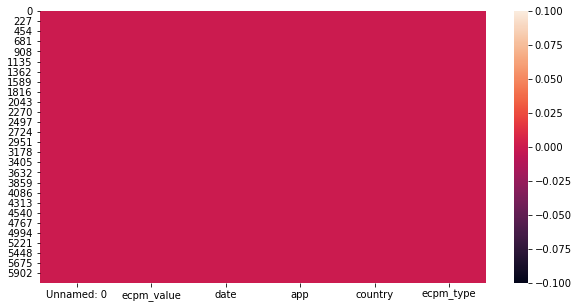

In [8]:
# The first data set does not have any missing values
plt.figure(figsize=(10,5))
sns.heatmap(df_A.isnull());

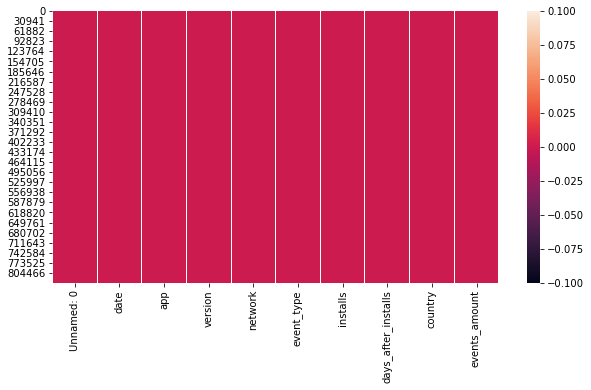

In [9]:
# The second data set does not have any missing values
plt.figure(figsize=(10,5))
sns.heatmap(df_B.isnull());

In [10]:
df_A.drop(columns='Unnamed: 0',inplace=True)
df_B.drop(columns='Unnamed: 0',inplace=True)

In [11]:
# We drop the fist column which is not necessary
df_A.head(5)

,ecpm_value,date,app,country,ecpm_type
0,0.757282,2021-06-04 13:30:27.883259,awesome app A,US,banner
1,0.788831,2021-06-05 13:30:27.883259,awesome app A,US,banner
2,0.796442,2021-06-06 13:30:27.883259,awesome app A,US,banner
3,0.807773,2021-06-07 13:30:27.883259,awesome app A,US,banner
4,0.747525,2021-06-08 13:30:27.883259,awesome app A,US,banner


In [12]:
df_B.head(5)

,date,app,version,network,event_type,installs,days_after_installs,country,events_amount
0,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0
1,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0
2,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0
3,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0
4,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0


In [13]:
df_A['app'].value_counts(normalize=True)*100

awesome app A      50.0
brilliant app B    50.0
Name: app, dtype: float64

on the top, we distribute the type of applications and it shows awesome A and Brilliant B has the same percentage .

In [14]:
df_B['version'].value_counts(normalize=True)*100

2.0    44.358974
1.0    25.384615
1.1    18.168498
2.2    12.087912
Name: version, dtype: float64

On the top, we distribute the type of versions and it shows that version 2 has the highest %(44.35) and after this, bersion 1 with the 25 % has the second hghest percent 

In [15]:
df_B['event_type'].value_counts(normalize=True)*100

banner          50.0
interstitial    50.0
Name: event_type, dtype: float64

on the top, we distribute the type of events and it shows banner and interstitial has the same percentage .

In [16]:
# we want to use groupby with the country and ecpm_value(effective cost per mile)
df_A.groupby('app').mean().sort_values('ecpm_value',ascending=True)

,ecpm_value
app,
brilliant app B,5.408001
awesome app A,5.413568


As you see on the top, we use the first dataset mobile app with distribute the app and the mean of the effective cost per mile.both of the Brilliant app B and Awesome app A has the the same mean ecpm_value.

In [17]:
df_A.groupby('ecpm_type').mean().sort_values('ecpm_value',ascending=True)

,ecpm_value
ecpm_type,
banner,0.707727
interstitial,10.113841


Like the previous one, for the first dataset,the mean ecpm value for interstitial is almost 10 and for banner is less than 1.

In [18]:
df_B.groupby('event_type').mean().sort_values('events_amount',ascending=True)

,version,installs,days_after_installs,events_amount
event_type,,,,
interstitial,1.606813,93760.078022,29.666667,2.088088e+05
banner,1.606813,93760.078022,29.666667,3.319056e+06


We use the second the dataset then we distribute the Event type with amount of them from top to down.it shows that the maean amount  of banner is more than interstitial.

In [19]:
df_B.groupby('network').mean().sort_values('installs',ascending=True)

,version,installs,days_after_installs,events_amount
network,,,,
AdNetwork S,1.606813,81666.501451,29.666667,1.537802e+06
AdNetwork P,1.606813,90737.579466,29.666667,1.704946e+06
AdNetwork Q,1.606813,108876.153149,29.666667,2.049049e+06


Like the prevous one, we have 3 different network( s, p, q) and mean of the installs per day is shown on the graph.Adnetwork Q has the highest portion, almost 108876 installs and then Adnetwork P is the second one with 90737 installs.

In [20]:
df_B.groupby('country').mean().sort_values('events_amount',ascending=False)

,version,installs,days_after_installs,events_amount
country,,,,
TR,1.606813,107272.068295,29.666667,2.025884e+06
MX,1.606813,105638.001547,29.666667,1.980971e+06
GB,1.606813,103327.120757,29.666667,1.958232e+06
IT,1.606813,103861.706634,29.666667,1.948445e+06
JP,1.606813,102797.477127,29.666667,1.933218e+06
VN,1.606813,100914.226292,29.666667,1.897654e+06
US,1.606813,99078.082051,29.666667,1.854169e+06
RU,1.606813,96095.716036,29.666667,1.813837e+06
IN,1.606813,90053.430810,29.666667,1.706235e+06


We distribute the countries with the mean of events amount and it shows that TR has the first country with the highest amount and Estonia has the lowest one.

In [21]:
pd.pivot_table(df_A, index=['app','ecpm_type'],values='ecpm_value')

ecpm_value
app             ecpm_type               
awesome app A   banner          0.707944
                interstitial   10.119192
brilliant app B banner          0.707510
                interstitial   10.108491

I use the Pivot with app and ecpm type  with the values ecpm_value.It shows that the average of ecpm for awesome app and banner type is .70 and for interstitial is 10,11.
for the Brilliant app B and banner type , the average of the ecpm is .7075 and for interstitial is 10.10.

In [22]:
pd.pivot_table(df_B, index=['app','network','event_type'],values='events_amount')

events_amount
app             network     event_type                 
awesome app A   AdNetwork P banner         2.551106e+06
                            interstitial   2.022430e+05
                AdNetwork Q banner         3.060149e+06
                            interstitial   2.429019e+05
                AdNetwork S banner         2.298711e+06
                            interstitial   1.825846e+05
brilliant app B AdNetwork P banner         3.864303e+06
                            interstitial   2.021321e+05
                AdNetwork Q banner         4.651546e+06
                            interstitial   2.415971e+05
                AdNetwork S banner         3.488519e+06
                            interstitial   1.813940e+05

With Pivot, we find out the average of the events amount is for awesome A for different network.
As you see, the average of amount is for AdNetwork Q has the hghest portion .
For Brilliant app B , like the Awesome app A, AdNetwork Q has the higehst amount.

In [23]:
pd.pivot_table(df_B, index=['app','network','event_type'],values='events_amount')

events_amount
app             network     event_type                 
awesome app A   AdNetwork P banner         2.551106e+06
                            interstitial   2.022430e+05
                AdNetwork Q banner         3.060149e+06
                            interstitial   2.429019e+05
                AdNetwork S banner         2.298711e+06
                            interstitial   1.825846e+05
brilliant app B AdNetwork P banner         3.864303e+06
                            interstitial   2.021321e+05
                AdNetwork Q banner         4.651546e+06
                            interstitial   2.415971e+05
                AdNetwork S banner         3.488519e+06
                            interstitial   1.813940e+05

In [24]:
pd.pivot_table(df_B, index=['country'],values='installs')

,installs
country,
AU,85687.537648
BR,83535.103500
CA,87029.078185
DE,85671.266626
ES,82736.165731
FR,87018.037892
GB,103327.120757
ID,82621.000407
IN,90053.430810


In [25]:
df_B['app'].unique()
app_version=pd.crosstab(df_B['app'],df_B['version'])
app_version

version,1.0,1.1,2.0,2.2
app,,,,
awesome app A,212058,151776,53856,0
brilliant app B,0,0,316710,100980


In [26]:
df_B['version'].unique()
version_network=pd.crosstab(df_B['version'],df_B['network'])
version_network

network,AdNetwork P,AdNetwork Q,AdNetwork S
version,,,
1.0,70686,70686,70686
1.1,50592,50592,50592
2.0,123522,123522,123522
2.2,33660,33660,33660


On the top, we distribute the versions with their Network.It shows that Version 2 in all AdNetwork has the highest amount.

In [27]:
df_A.head(5)

,ecpm_value,date,app,country,ecpm_type
0,0.757282,2021-06-04 13:30:27.883259,awesome app A,US,banner
1,0.788831,2021-06-05 13:30:27.883259,awesome app A,US,banner
2,0.796442,2021-06-06 13:30:27.883259,awesome app A,US,banner
3,0.807773,2021-06-07 13:30:27.883259,awesome app A,US,banner
4,0.747525,2021-06-08 13:30:27.883259,awesome app A,US,banner


In [28]:
df_A_grouped_sum=df_A.groupby('ecpm_type',as_index=False)['ecpm_value'].agg('sum').rename(columns={'ecpm_value':'ecpm_value_Sum'})
df_A_grouped_cnt=df_A.groupby('ecpm_type',as_index=False)['ecpm_value'].agg('count').rename(columns={'ecpm_value':'ecpm_value_Count'})

#mergr the 2 lines 
df_A_grouped_Average=df_A_grouped_sum.merge(df_A_grouped_cnt, left_on='ecpm_type',right_on='ecpm_type',how='inner')

# #Calculate the average ecpm_value(effective cost per mile)
df_A_grouped_Average.loc[:,'Average of ecpm value']=df_A_grouped_Average['ecpm_value_Sum']/df_A_grouped_Average['ecpm_value_Count']


# final result
df_A_grouped_Average.sort_values('ecpm_value_Sum',ascending=False)

,ecpm_type,ecpm_value_Sum,ecpm_value_Count,Average of ecpm value
1,interstitial,30948.354872,3060,10.113841
0,banner,2165.645477,3060,0.707727


One of the most interesting parts of the code is  Average ecpm value for interstitial ecpm is 10.11 and for banners, the type is less than one.

In [29]:
df_A_grouped_sum=df_A.groupby('app',as_index=False)['ecpm_value'].agg('sum').rename(columns={'ecpm_value':'ecpm_value_Sum'})
df_A_grouped_cnt=df_A.groupby('app',as_index=False)['ecpm_value'].agg('count').rename(columns={'ecpm_value':'ecpm_value_Count'})

#mergr the 2 lines 
df_A_grouped_Average=df_A_grouped_sum.merge(df_A_grouped_cnt, left_on='app',right_on='app',how='inner')

# #Calculate the average ecpm_value(effective cost per mile)
df_A_grouped_Average.loc[:,'Average of ecpm value']=df_A_grouped_Average['ecpm_value_Sum']/df_A_grouped_Average['ecpm_value_Count']


# final result
df_A_grouped_Average.sort_values('ecpm_value_Sum',ascending=False)

,app,ecpm_value_Sum,ecpm_value_Count,Average of ecpm value
0,awesome app A,16565.517863,3060,5.413568
1,brilliant app B,16548.482485,3060,5.408001


This is the one of the most interesting part of the code.The Average of ecpm value for Awesome app A  is 5.41 and for Brilliant app B  type is 5.40.

In [30]:
df_B_grouped_sum=df_B.groupby('app',as_index=False)['events_amount'].agg('sum').rename(columns={'events_amount':'events_amount_Sum'})
df_B_grouped_cnt=df_B.groupby('app',as_index=False)['events_amount'].agg('count').rename(columns={'events_amount':'events_amount_Count'})

#mergr the 2 lines 
df_B_grouped_Average=df_B_grouped_sum.merge(df_B_grouped_cnt, left_on='app',right_on='app',how='inner')

# #Calculate the average ecpm_value(effective cost per mile)
df_B_grouped_Average.loc[:,'Average of events amount']=df_B_grouped_Average['events_amount_Sum']/df_B_grouped_Average['events_amount_Count']


# final result
df_B_grouped_Average.sort_values('events_amount_Sum',ascending=False)

,app,events_amount_Sum,events_amount_Count,Average of events amount
1,brilliant app B,8.792021e+11,417690,2.104915e+06
0,awesome app A,5.943517e+11,417690,1.422949e+06


This statistic shows that the average of events amount for Brilliant B is more than awesome A

In [31]:
df_B_grouped_sum=df_B.groupby('event_type',as_index=False)['events_amount'].agg('sum').rename(columns={'events_amount':'events_amount_Sum'})
df_B_grouped_cnt=df_B.groupby('event_type',as_index=False)['events_amount'].agg('count').rename(columns={'events_amount':'events_amount_Count'})

#mergr the 2 lines 
df_B_grouped_Average=df_B_grouped_sum.merge(df_B_grouped_cnt, left_on='event_type',right_on='event_type',how='inner')

# #Calculate the average ecpm_value(effective cost per mile)
df_B_grouped_Average.loc[:,'Average of events amount']=df_B_grouped_Average['events_amount_Sum']/df_B_grouped_Average['events_amount_Count']


# final result
df_B_grouped_Average.sort_values('events_amount_Sum',ascending=False)

,event_type,events_amount_Sum,events_amount_Count,Average of events amount
0,banner,1.386336e+12,417690,3.319056e+06
1,interstitial,8.721734e+10,417690,2.088088e+05


we find out the average of events amount with 2 type od event which is divided to banner and interstitial.
It shows the average of events for banner type is more than interstitial

In [32]:
df_B_grouped_sum=df_B.groupby('version',as_index=False)['events_amount'].agg('sum').rename(columns={'events_amount':'events_amount_Sum'})
df_B_grouped_cnt=df_B.groupby('version',as_index=False)['events_amount'].agg('count').rename(columns={'events_amount':'events_amount_Count'})

#mergr the 2 lines 
df_B_grouped_Average=df_B_grouped_sum.merge(df_B_grouped_cnt, left_on='version',right_on='version',how='inner')

# #Calculate the average ecpm_value(effective cost per mile)
df_B_grouped_Average.loc[:,'Average of events amount']=df_B_grouped_Average['events_amount_Sum']/df_B_grouped_Average['events_amount_Count']


# final result
df_B_grouped_Average.sort_values('events_amount_Sum',ascending=False)

,version,events_amount_Sum,events_amount_Count,Average of events amount
2,2.0,7.592397e+11,370566,2.048865e+06
0,1.0,3.457651e+11,212058,1.630522e+06
3,2.2,3.238684e+11,100980,3.207253e+06
1,1.1,4.468047e+10,151776,2.943843e+05


Like the previous one, we distibute the versions which the version 2.2 has the highest portion the average of events.

In [33]:
#It is necessary to establish the presence of duplicates. If they are found, delete them and check if they are all deleted.
df_A.duplicated().sum()

0

In [34]:
def number_of_job(df_A,app,date ):
    number_list=df_A[(df_A['app']== app)&(df_A['date']== date)]
    number_list_count=number_list['country'].count()
    return number_list_count          

In [35]:
# we see the number of 2021-07-26 13:30:27.883259 date with Brilliant app B 
number_of_job(df_A,'brilliant app B', '2021-07-26 13:30:27.883259' )

34

In [36]:
number_of_job(df_A,'awesome app A','2021-06-28 13:30:27.883259')

34

# Data analysis

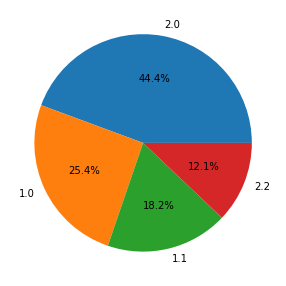

In [37]:
# It has the highest amount of the version which has the highest amount 
plt.rcParams['figure.figsize']=(10,5)
df_B['version'].value_counts().sort_values(ascending=False).plot.pie(y='version',autopct="%0.1f%%")
plt.axis('off')
plt.show()

It shows that the number of vesion 2.0 is is the first(44.4 %) and 2.2 is the last one(12.1).

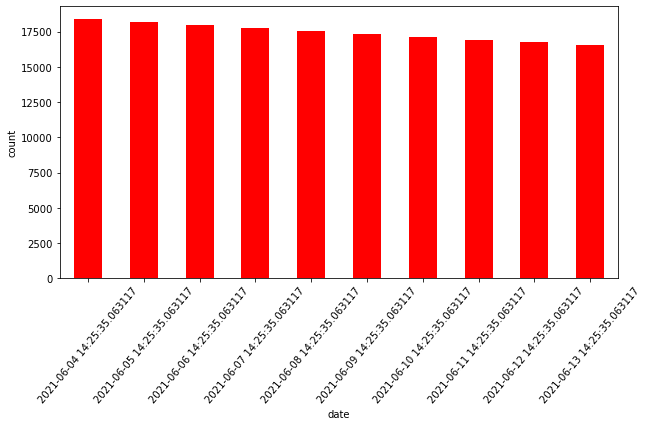

In [38]:
# It has the highest amount of the data which has the highest amount  
plt.rcParams['figure.figsize']=(10,5)
df_B['date'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='Red')
plt.xlabel('date')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.show()

we choose the fist top dates which installs the app mobile.As you see, the date 2021-06-04 at 14:25:35 has the highest amount in all data which mobiles were installed.

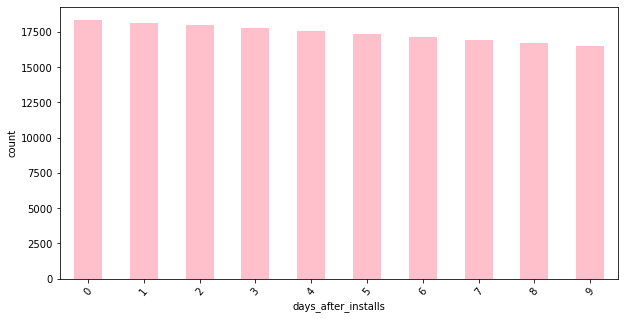

In [39]:
# It has the highest amount of the days after installs which has the highest amount 
plt.rcParams['figure.figsize']=(10,5)
df_B['days_after_installs'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='pink')
plt.xlabel('days_after_installs')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.show()

On the top,the max day after installing the mobile app is zero and it means that immediately they install the app on mobile and it is a good.

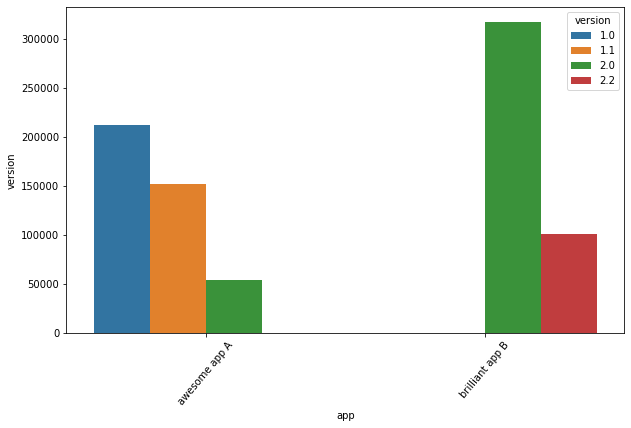

In [40]:
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(df_B['app'],hue=df_B['version'],ax=ax)
plt.xlabel('app')
plt.ylabel('version')
plt.xticks(rotation=50)
plt.show()

On the top, we distribute the type of App and which  of them has the highest amount of the version.
As you see, for Awesome app A , version 1.0 has the highest amount and for Brilliant app B, version 2 has the higehst amount.

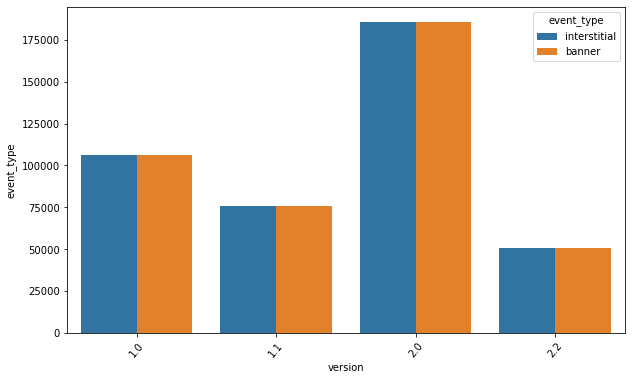

In [41]:
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(df_B['version'],hue=df_B['event_type'],ax=ax)
plt.xlabel('version')
plt.ylabel('event_type')
plt.xticks(rotation=50)
plt.show()

On the top, we distribute the versions with the event type.
As you see, for version 2 has the highest number and has the same amount of event type.

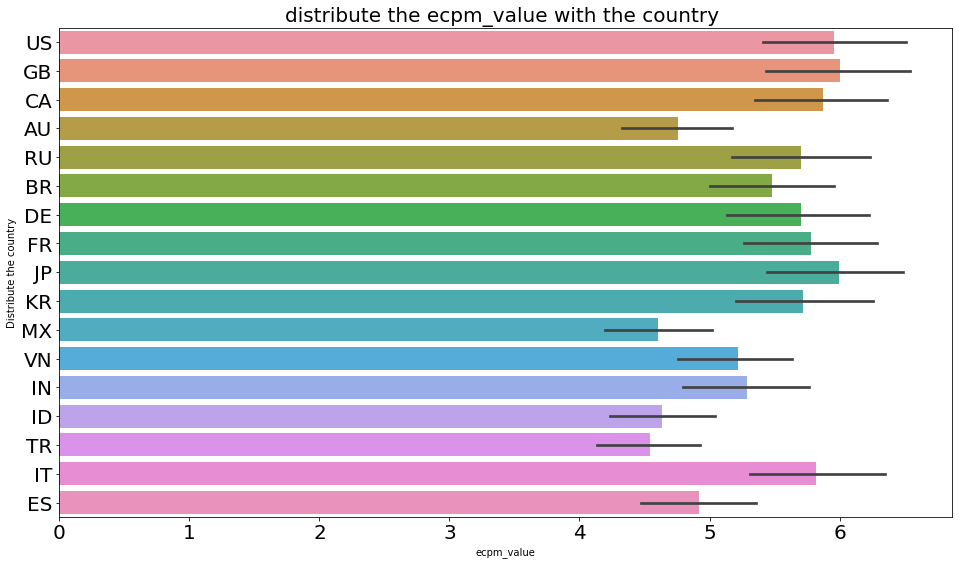

In [42]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax = sns.barplot(x='ecpm_value', y='country', data=df_A, orient='h')
ax.axes.set_title("distribute the ecpm_value with the country ",fontsize=20)
ax.set_xlabel("ecpm_value")
ax.set_ylabel("Distribute the country")
sns.color_palette("Set2")
ax.tick_params(labelsize=20)

On the top, we use the barplot with the ecpm value and the countries which we distributed .
The Great Britain has the amount between 5.5 to 7 and the US has the same but starts from 4.8.
Also Japan,Italy and Canada has the highest number of ecpm 

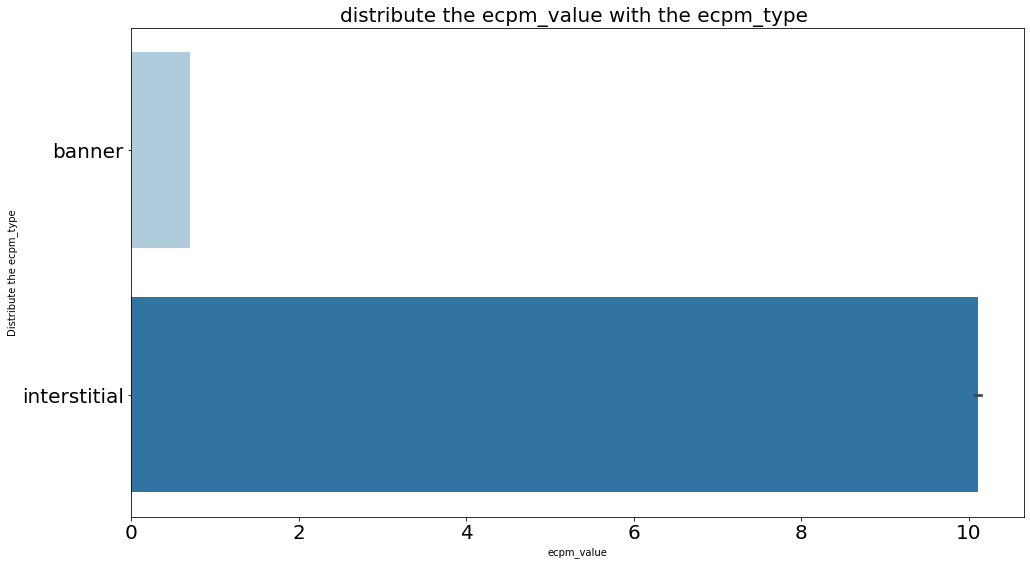

In [43]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax = sns.barplot(x='ecpm_value', y='ecpm_type', data=df_A, orient='h')
ax.axes.set_title("distribute the ecpm_value with the ecpm_type ",fontsize=20)
ax.set_xlabel("ecpm_value")
ax.set_ylabel("Distribute the ecpm_type")
sns.color_palette("Set2")
ax.tick_params(labelsize=20)

The number of interstitial in ecpm valus is more than banner and the max of the amount is 10 but for benner is less than one.

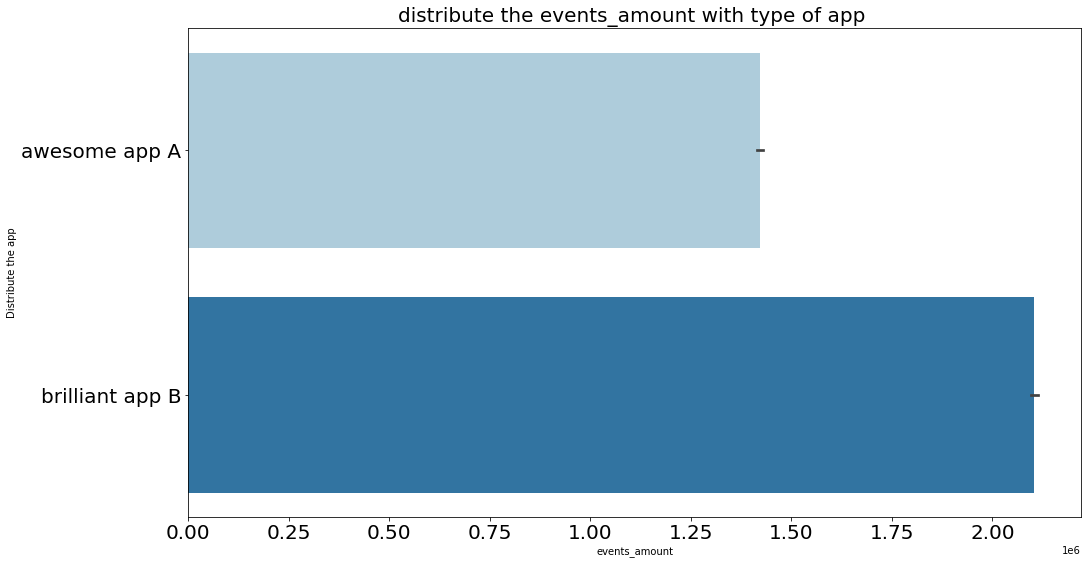

In [44]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax = sns.barplot(x='events_amount', y='app', data=df_B, orient='h')
ax.axes.set_title("distribute the events_amount with type of app ",fontsize=20)
ax.set_xlabel("events_amount")
ax.set_ylabel("Distribute the app")
sns.color_palette("Set2")
ax.tick_params(labelsize=20)

We work with the second dataset. we divide the app into Brilliant and awesome with a range of events_amount. The amount of Brilliant B app is more the Awesome app A.

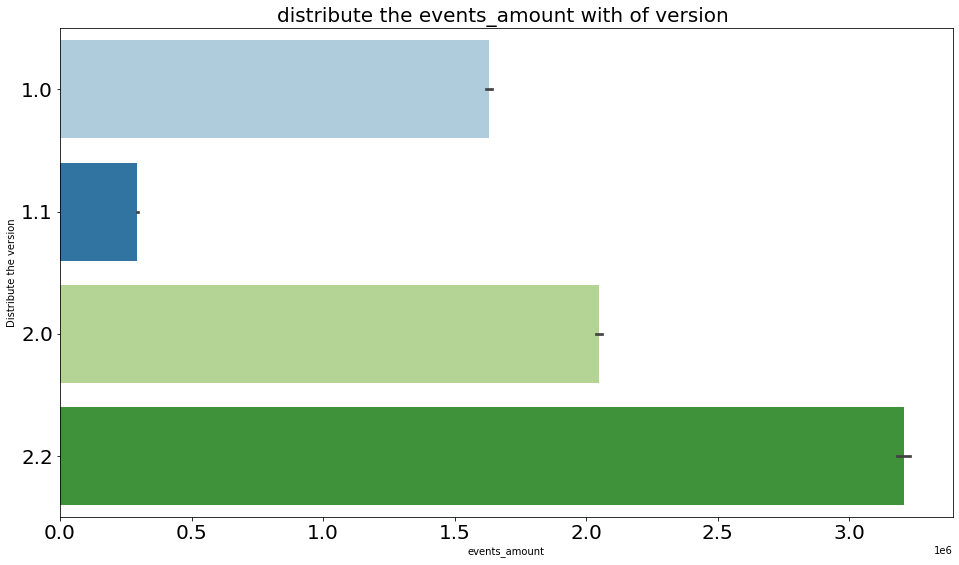

In [45]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax = sns.barplot(x='events_amount', y='version', data=df_B, orient='h')
ax.axes.set_title("distribute the events_amount with of version ",fontsize=20)
ax.set_xlabel("events_amount")
ax.set_ylabel("Distribute the version")
sns.color_palette("Set2")
ax.tick_params(labelsize=20)

We use the barplot with events amount and type of versions.As you see, the version 2.2 has the highest amount of events and version 1.1 has the lowest amount.

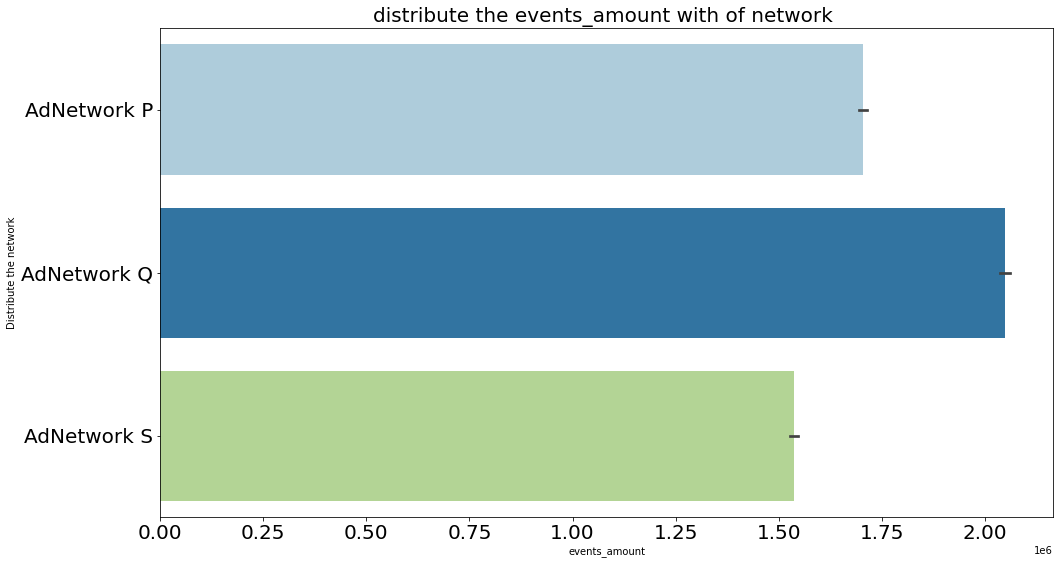

In [46]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax = sns.barplot(x='events_amount', y='network', data=df_B, orient='h')
ax.axes.set_title("distribute the events_amount with of network ",fontsize=20)
ax.set_xlabel("events_amount")
ax.set_ylabel("Distribute the network")
sns.color_palette("Set2")
ax.tick_params(labelsize=20)

We use the barplot with events amount and type of Network.As you see, the Adnetwork Q  has the highest amount of events and Adnetwork S has the lowest amount.

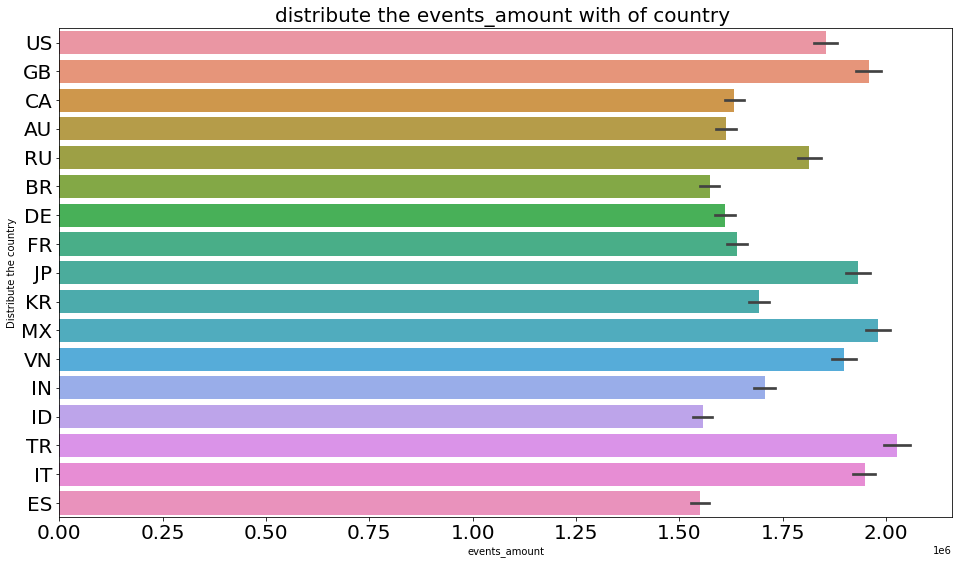

In [47]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax = sns.barplot(x='events_amount', y='country', data=df_B, orient='h')
ax.axes.set_title("distribute the events_amount with of country ",fontsize=20)
ax.set_xlabel("events_amount")
ax.set_ylabel("Distribute the country")
sns.color_palette("Set2")
ax.tick_params(labelsize=20)

On the top, we use the barplot with the events amount and the countries which we distributed .
The Great Britain and Turkey has the amount between 1.90 to 2.0.
Also Japan,Italy and Mexico and the US are the next levels.

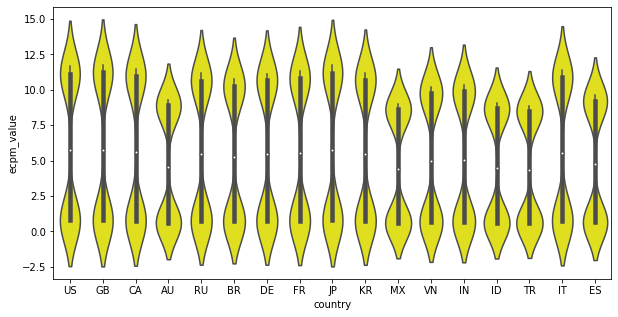

<Figure size 720x360 with 0 Axes>

In [48]:
sns.violinplot(x='country',y='ecpm_value',data=df_A, color='yellow')
plt.figure('Find out type of country with the ecpm_valu ')
plt.show()

We use the violinplot to find out the counties with their ecpm values and it shows that the US,Italy, Great Britain and Japan has the highest amount of ecpm.

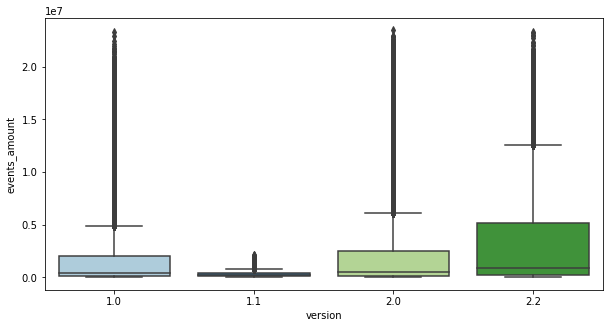

In [49]:
sns.boxplot(x='version',y='events_amount',data=df_B)
plt.title=('compare the events_amount with the events_amount')
plt.show()

As you see, the verson 2.2 has the highest amount of events and version 1.1 has the lowest .

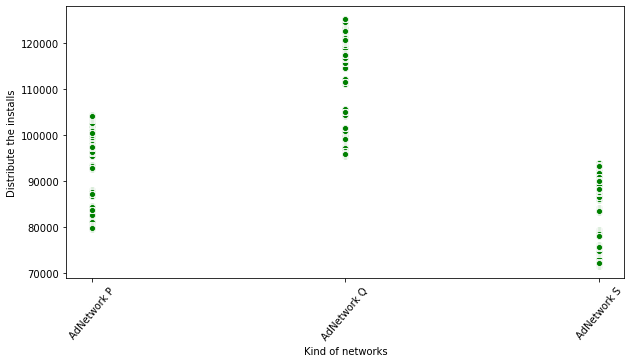

In [50]:
sns.scatterplot(x='network',y='installs',data=df_B,color='green')
plt.xlabel('Kind of networks')
plt.ylabel('Distribute the installs')
plt.xticks(rotation=50)
plt.show()
# The Adnetwork Q has the highest amount.

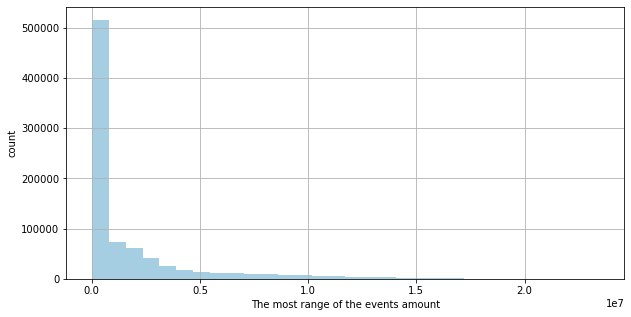

In [53]:
# It shows that most range of the events amount which shows  the range  
df_B['events_amount'].hist(bins=30)
plt.xlabel('The most range of the events amount')
plt.ylabel('count')
plt.show()

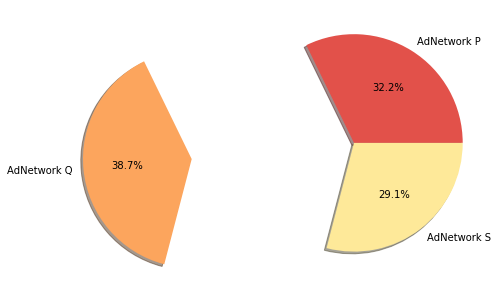

In [57]:
pm = df_B[['events_amount', 'network']].groupby(['network']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize=(10,5))
plt.pie(pm['events_amount']['sum'], labels = pm.index, explode = (0, 1.5, 0 ), 
        shadow = True, autopct = '%1.1f%%')
plt.show()

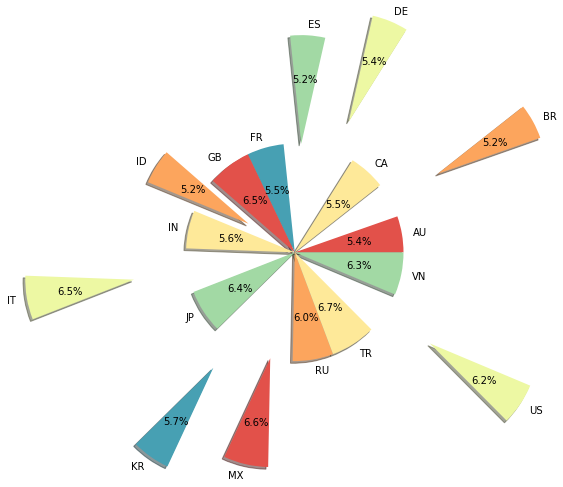

In [61]:
pm = df_B[['installs', 'country']].groupby(['country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize=(10,5))
plt.pie(pm['installs']['sum'], labels = pm.index, explode = (0, 1.5, 0, 1.3, 1, 0, 0, 0.5, 0, 1.5, 0, 1.3, 1, 0, 0,1.5, 0), 
        shadow = True, autopct = '%1.1f%%')
plt.show()